In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [61]:
train = pd.read_csv('/home/abhishek/Desktop/Data/House Price Prediction/train.csv')
test = pd.read_csv('/home/abhishek/Desktop/Data/House Price Prediction/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
print (min(train.SalePrice))
print (max(train.SalePrice))

34900
755000


(array([  7.,  15.,  53.,  73., 153., 227., 188., 155., 141.,  88.,  78.,
         66.,  44.,  42.,  20.,  29.,  20.,   8.,  10.,  13.,   7.,   5.,
          4.,   3.,   1.,   2.,   0.,   1.,   2.,   0.,   1.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900. ,  52902.5,  70905. ,  88907.5, 106910. , 124912.5,
        142915. , 160917.5, 178920. , 196922.5, 214925. , 232927.5,
        250930. , 268932.5, 286935. , 304937.5, 322940. , 340942.5,
        358945. , 376947.5, 394950. , 412952.5, 430955. , 448957.5,
        466960. , 484962.5, 502965. , 520967.5, 538970. , 556972.5,
        574975. , 592977.5, 610980. , 628982.5, 646985. , 664987.5,
        682990. , 700992.5, 718995. , 736997.5, 755000. ]),
 <a list of 40 Patch objects>)

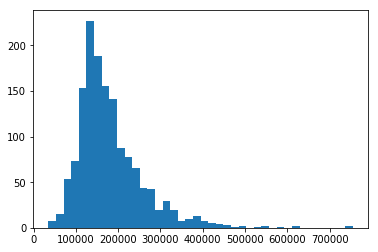

In [64]:
plt.hist(train.SalePrice,bins = 40)

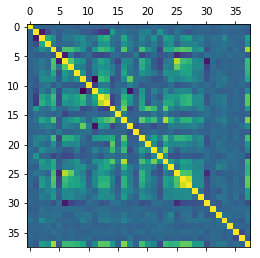

In [65]:
plt.matshow(train.corr())

In [66]:
train.corr().SalePrice.sort_values(ascending = False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

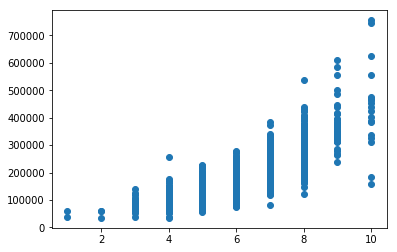

In [67]:
plt.scatter(train.OverallQual, train.SalePrice)

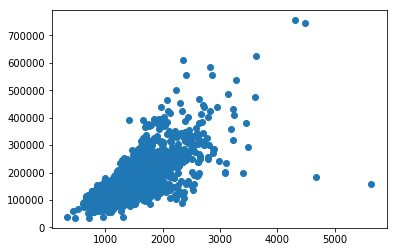

In [68]:
plt.scatter(train.GrLivArea, train.SalePrice)

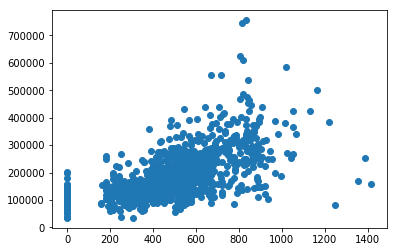

In [69]:
plt.scatter(train.GarageArea, train.SalePrice)

lot of houses with zero GarageArea but high prices, might skew the results

In [70]:
train.corr().GarageArea.sort_values(ascending = False).head()

GarageArea     1.000000
GarageCars     0.882475
SalePrice      0.623431
GarageYrBlt    0.564567
OverallQual    0.562022
Name: GarageArea, dtype: float64

GarageArea highly correlated to GarageCars since Area will define number of Cars; Hence can use only 1 of the variables

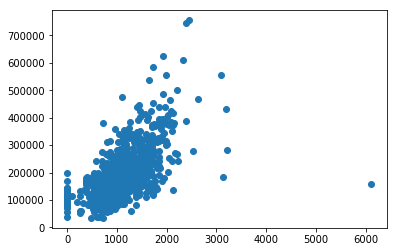

In [71]:
plt.scatter(train.TotalBsmtSF, train.SalePrice)

In [72]:
train.corr().TotalBsmtSF.sort_values(ascending = False).head()

TotalBsmtSF    1.000000
1stFlrSF       0.819530
SalePrice      0.613581
OverallQual    0.537808
BsmtFinSF1     0.522396
Name: TotalBsmtSF, dtype: float64

1stFlrSF Might be related to TotalBsmtSF; try skipping

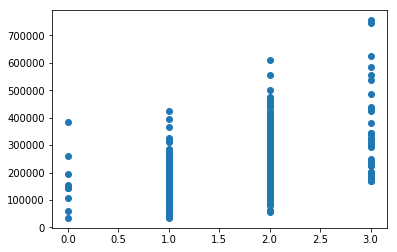

In [73]:
plt.scatter(train.FullBath, train.SalePrice)

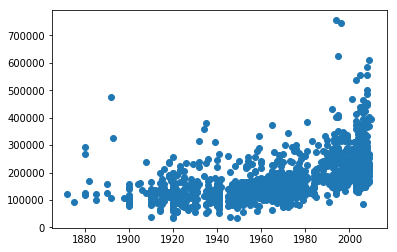

In [74]:
plt.scatter(train.YearBuilt, train.SalePrice)

## Removing Missing Values and Outliers

In [75]:
print ('Total rows',len(train.index))

Total rows 1460


In [76]:
missing_values = pd.DataFrame(train.isnull().sum().sort_values(ascending = False), columns = ['Missing'])
print (missing_values.head(19))
missing_cols = list(missing_values[missing_values.Missing > 81].index)
print ('to be removed', missing_cols)

              Missing
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
to be removed ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']


Removing columns with missing values > than x%

In [77]:
train = train.drop(columns=missing_cols)
test = test.drop(columns=missing_cols)

Check rest of the columns with missing vales: MasVnrArea, MasVnrType and Electrical

1. Electrical

In [78]:
print ('All distinct values for this column', train.Electrical.unique())
print ('SBrkr', len(train[train.Electrical == 'SBrkr']))
print ('FuseF', len(train[train.Electrical == 'FuseF']))
print ('FuseA', len(train[train.Electrical == 'FuseA']))
print ('FuseP', len(train[train.Electrical == 'FuseP']))
print ('Mix', len(train[train.Electrical == 'Mix']))

All distinct values for this column ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
SBrkr 1334
FuseF 27
FuseA 94
FuseP 3
Mix 1


SBrkr is the most common having 1334/1460 observations. Hence, replacing the missing row with 'SBrkr'****

In [79]:
train['Electrical'] = train.Electrical.fillna('SBrkr')
test['Electrical'] = test.Electrical.fillna('SBrkr')

2. MasVnrType / MasVnrArea

In [80]:
print ('All distinct values for this column', train.MasVnrType.unique())
print ('BrkFace', len(train[train.MasVnrType == 'BrkFace']))
print ('None', len(train[train.MasVnrType == 'None']))
print ('Stone', len(train[train.MasVnrType == 'Stone']))
print ('BrkCmn', len(train[train.MasVnrType == 'BrkCmn']))

All distinct values for this column ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BrkFace 445
None 864
Stone 128
BrkCmn 15


Check the value of MasVnrArea for rows with Null values in MasVnrType

In [81]:
train[['Id','MasVnrType','MasVnrArea']][train.MasVnrType.isnull()]

,Id,MasVnrType,MasVnrArea
234,235,NaN,NaN
529,530,NaN,NaN
650,651,NaN,NaN
936,937,NaN,NaN
973,974,NaN,NaN
977,978,NaN,NaN
1243,1244,NaN,NaN
1278,1279,NaN,NaN


They both have same 8 missing observations. So, 
either delete those 8 rows and keep the two variables. Or delete the MasVnrType column, since MasVnrArea is correlated with 'SalePrice'and MasVnrType and MasVnrArea might be correlated. 
Since observations are less, delete the column

In [82]:
train = train.drop(columns=['MasVnrType'])
test = test.drop(columns=['MasVnrType'])
train.corr().MasVnrArea.sort_values(ascending = False).head()

MasVnrArea     1.000000
SalePrice      0.477493
OverallQual    0.411876
GrLivArea      0.390857
GarageArea     0.373066
Name: MasVnrArea, dtype: float64

Plot MasVnrArea to check for any outliers. If outliers are present, replace missing values by median else replace by mean

zero values 861


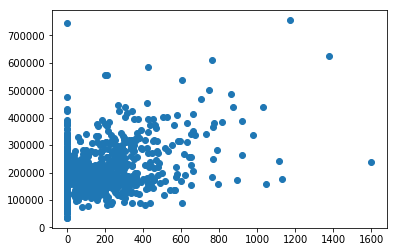

In [83]:
plt.scatter(train.MasVnrArea, train.SalePrice)
print ('zero values', len(train[train.MasVnrArea == 0].index))

861/1460(~60%) observations are 0**

Repalce missing values of MasVnrArea with 0

In [84]:
train['MasVnrArea'] = train.MasVnrArea.fillna(0)
test['MasVnrArea'] = test.MasVnrArea.fillna(0)

Checking BsmtExposure variable

In [85]:
print ('All distinct values for this column', train.BsmtExposure.unique())
print ('No', len(train[train.BsmtExposure == 'No']))
print ('Gd', len(train[train.BsmtExposure == 'Gd']))
print ('Mn', len(train[train.BsmtExposure == 'Mn']))
print ('Av', len(train[train.BsmtExposure == 'Av']))

All distinct values for this column ['No' 'Gd' 'Mn' 'Av' nan]
No 953
Gd 134
Mn 114
Av 221


Replacing Nulls with 'No'

In [86]:
train['BsmtExposure'] = train.BsmtExposure.fillna('No')
test['BsmtExposure'] = test.BsmtExposure.fillna('No')

Checking if any missing values are still present in Train and Test data

In [87]:
print ('Train', train.isnull().sum().sort_values(ascending=False).head())
print ('Test', test.isnull().sum().sort_values(ascending=False).head())

Train GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
dtype: int64
Test GarageCond      78
GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageType      76
dtype: int64


Few missing values are still present in Test and Train Dataset

In [88]:
test_missing = pd.DataFrame(test.isnull().sum(), columns=['number_of_outliers']).reset_index()
print (test_missing[test_missing.number_of_outliers > 0])
test_missing_columns = list(test_missing[test_missing.number_of_outliers > 0]['index'])

train_missing = pd.DataFrame(train.isnull().sum(), columns=['number_of_outliers']).reset_index()
print (train_missing[train_missing.number_of_outliers > 0])
train_missing_columns = list(train_missing[train_missing.number_of_outliers > 0]['index'])


           index  number_of_outliers
2       MSZoning                   4
7      Utilities                   2
21   Exterior1st                   1
22   Exterior2nd                   1
27      BsmtQual                  44
28      BsmtCond                  45
30  BsmtFinType1                  42
31    BsmtFinSF1                   1
32  BsmtFinType2                  42
33    BsmtFinSF2                   1
34     BsmtUnfSF                   1
35   TotalBsmtSF                   1
44  BsmtFullBath                   2
45  BsmtHalfBath                   2
50   KitchenQual                   1
52    Functional                   2
54    GarageType                  76
55   GarageYrBlt                  78
56  GarageFinish                  78
57    GarageCars                   1
58    GarageArea                   1
59    GarageQual                  78
60    GarageCond                  78
71      SaleType                   1
           index  number_of_outliers
27      BsmtQual                  37
2

Replacing NA with mean if the column is numeric and with mode if the column is categorical

In [89]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in test_missing_columns:
    if is_numeric_dtype(test[col]) == True:
        test[col] = test[col].fillna(np.mean(test[col]))
    else:
        test[col] = test[col].fillna(test[col].mode()[0])

In [90]:
for col in train_missing_columns:
    if is_numeric_dtype(train[col]) == True:
        train[col] = train[col].fillna(np.mean(train[col]))
    else:
        train[col] = train[col].fillna(train[col].mode()[0])

In [91]:
print ('Train', train.isnull().sum().sort_values(ascending=False).head())
print ('Test', test.isnull().sum().sort_values(ascending=False).head())

Train SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
dtype: int64
Test SaleCondition    0
TotalBsmtSF      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64


Missing values eliminated

### Outliers

In [92]:
train.corr().SalePrice.sort_values(ascending = False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Remove outliers of highly correlated variables
1. GrLivArea
2. GarageArea -

In [93]:
train = train[~((train.GrLivArea > 4000) & (train.SalePrice < 300000))]
train = train[~((train.GarageArea > 1200) & (train.SalePrice < 300000))]

3. TotalBsmtSF - removed while removing the prior observations.****
Also, it has a very high correlation with 1stFlrSF, hence this variable can be excluded

In [94]:
train.corr().TotalBsmtSF.sort_values(ascending = False).head(5)

TotalBsmtSF    1.000000
1stFlrSF       0.803142
SalePrice      0.651286
OverallQual    0.539076
GarageArea     0.476729
Name: TotalBsmtSF, dtype: float64

## Transforming data

Normalize target variable SalePrice

In [95]:
from scipy import stats

(array([  2.,   2.,   1.,   0.,   0.,   2.,   3.,   4.,   3.,   5.,   3.,
         15.,  29.,  26.,  27.,  41.,  68.,  87., 126., 144., 103., 104.,
        134., 104.,  77.,  76.,  59.,  59.,  35.,  36.,  26.,  16.,  16.,
          9.,   4.,   1.,   3.,   3.,   0.,   2.]),
 array([2.34758434, 2.35402574, 2.36046713, 2.36690852, 2.37334992,
        2.37979131, 2.38623271, 2.3926741 , 2.39911549, 2.40555689,
        2.41199828, 2.41843967, 2.42488107, 2.43132246, 2.43776385,
        2.44420525, 2.45064664, 2.45708803, 2.46352943, 2.46997082,
        2.47641221, 2.48285361, 2.489295  , 2.4957364 , 2.50217779,
        2.50861918, 2.51506058, 2.52150197, 2.52794336, 2.53438476,
        2.54082615, 2.54726754, 2.55370894, 2.56015033, 2.56659172,
        2.57303312, 2.57947451, 2.58591591, 2.5923573 , 2.59879869,
        2.60524009]),
 <a list of 40 Patch objects>)

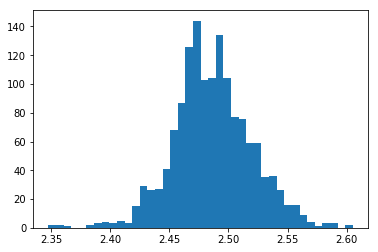

In [96]:
train['SalePrice'] = np.log1p(train.SalePrice)
plt.hist(np.log(train.SalePrice),bins = 40)

(array([  1.,   0.,   0.,   1.,   1.,   1.,   1.,   7.,  10.,  21.,  64.,
         65.,  74., 108., 108., 113., 140., 166., 174., 115.,  95.,  67.,
         45.,  41.,  19.,   6.,   7.,   3.,   0.,   2.]),
 array([5.81413053, 5.9005498 , 5.98696906, 6.07338832, 6.15980759,
        6.24622685, 6.33264612, 6.41906538, 6.50548465, 6.59190391,
        6.67832317, 6.76474244, 6.8511617 , 6.93758097, 7.02400023,
        7.1104195 , 7.19683876, 7.28325802, 7.36967729, 7.45609655,
        7.54251582, 7.62893508, 7.71535434, 7.80177361, 7.88819287,
        7.97461214, 8.0610314 , 8.14745067, 8.23386993, 8.32028919,
        8.40670846]),
 <a list of 30 Patch objects>)

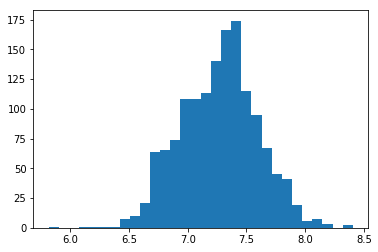

In [97]:
train['GrLivArea'] = np.log1p(train.GrLivArea)
test['GrLivArea'] = np.log1p(test.GrLivArea)
plt.hist(train.GrLivArea, bins = 30)

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,
         35., 160., 133., 288., 428., 180., 123.,  15.]),
 array([0.        , 0.23691418, 0.47382836, 0.71074255, 0.94765673,
        1.18457091, 1.42148509, 1.65839928, 1.89531346, 2.13222764,
        2.36914182, 2.60605601, 2.84297019, 3.07988437, 3.31679855,
        3.55371274, 3.79062692, 4.0275411 , 4.26445528, 4.50136947,
        4.73828365, 4.97519783, 5.21211201, 5.4490262 , 5.68594038,
        5.92285456, 6.15976874, 6.39668293, 6.63359711, 6.87051129,
        7.10742547]),
 <a list of 30 Patch objects>)

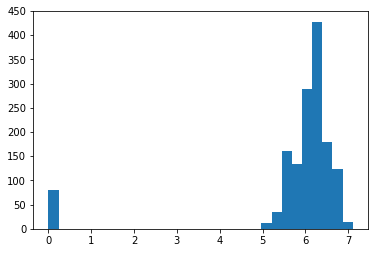

In [98]:
train['GarageArea'] = np.log1p(train.GarageArea)
test['GarageArea'] = np.log1p(test.GarageArea)
plt.hist(train.GarageArea, bins = 30)

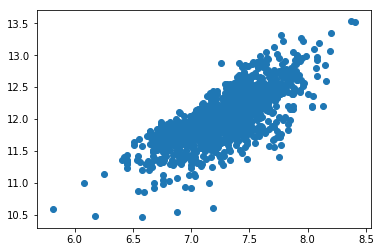

In [99]:
plt.scatter(train.GrLivArea, train.SalePrice)

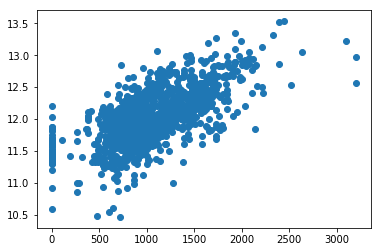

In [100]:
plt.scatter(train.TotalBsmtSF, train.SalePrice)

Transforming all highly skewed variables

In [101]:
from scipy.stats import skew
numeric_feats_train = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats_train = train[numeric_feats_train].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness_train = pd.DataFrame({'Skew' :skewed_feats_train})
skewness_train.head(10)

Skew in numerical features: 



,Skew
MiscVal,24.438392
PoolArea,15.915939
LotArea,12.619738
3SsnPorch,10.275636
LowQualFinSF,8.986091
KitchenAbvGr,4.474988
BsmtFinSF2,4.242537
ScreenPorch,4.109754
BsmtHalfBath,4.090953
EnclosedPorch,3.079918


In [102]:
numeric_feats_test = test.dtypes[test.dtypes != "object"].index
skewed_feats_test = test[numeric_feats_test].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness_test = pd.DataFrame({'Skew' :skewed_feats_test})
skewness_test.head(10)

Skew in numerical features: 



,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038570
ScreenPorch,3.784349
BsmtHalfBath,3.778564
LotArea,3.112013


Using BoxCox if required

In [44]:
# skewness = skewness_train[abs(skewness_train) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     train[feat] = boxcox1p(train[feat], lam)

There are 37 skewed numerical features to Box Cox transform


In [45]:
# skewness = skewness_test[abs(skewness_test) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     train[feat] = boxcox1p(train[feat], lam)

There are 36 skewed numerical features to Box Cox transform


In [103]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [104]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [105]:
print (len(train.columns))
print (len(test.columns))

266
250


## Models

In [106]:
y = train.SalePrice
train.drop("SalePrice", axis = 1, inplace = True)
train.drop("Id", axis = 1, inplace = True)

test_ids = test.Id
test.drop("Id", axis = 1, inplace = True)

In [107]:
train, test = train.align(test, join = 'inner', axis = 1)

In [108]:
def residual_sum_of_squares(y_predictions,y_values):
    residuals = y_values - y_predictions # make the vector of residuals via elementwise subtraction
    residuals_squared = residuals**2 # elementwise squaring
    RSS = np.sum(residuals_squared)
    return RSS

def root_mean_square_error(y_predictions,y_values):
    N = len(y_values) # The number of data points
    RSS = residual_sum_of_squares(y_predictions,y_values) # see above
    MSE = RSS/N # The mean squared error
    RMSE = np.sqrt(MSE)
    return RMSE

In [109]:
X = np.array(train)
X_test = np.array(test)
N,D = X.shape

### Linear Regression

In [111]:
linear_regression = LinearRegression()
mle_solution= linear_regression.fit(X,y) 
y_predictions = mle_solution.predict(X) 
RMSE = root_mean_square_error(y_predictions,y)

In [112]:
print('Linear regression with all features gives a RMSE = {:.4f}'.format(RMSE))

Linear regression with all features gives a RMSE = 0.0909


In [113]:
predictions = mle_solution.predict(X_test)
predictions = np.exp(predictions)

In [114]:
predictions

array([114219.35925783, 148151.44279711, 184183.52528699, ...,
       168513.20538618, 117143.9810778 , 222343.32631652])

In [115]:
sub = pd.DataFrame()
sub['Id'] = test_ids
sub['SalePrice'] = predictions
# sub.to_csv('submission_linear_regression.csv',index=False)

### Regularization

In [119]:
ridge = RidgeCV()
ridge_sol = ridge.fit(X,y)
y_predictions = ridge_sol.predict(X) 
RMSE = root_mean_square_error(y_predictions,y)

In [121]:
predictions = ridge.predict(X_test)
predictions = np.exp(predictions)

In [122]:
predictions

array([113085.54558451, 150486.0394895 , 179455.97350178, ...,
       163603.20442135, 114136.67080105, 221221.36684496])